<font color='blue'> **01_build_base_watershed_b_3099** </font> 

In [1]:
import pathlib as pl ; import flopy   ; import matplotlib.pyplot as plt ; import numpy as np ; from flopy.discretization import StructuredGrid ; import os
from typing import List, Tuple, Union ; from pathlib import Path ; import pickle ; import pandas as pd ; from flopy.utils.gridintersect import GridIntersect ; 
from shapely.geometry import LineString, Polygon ; import warnings ; warnings.filterwarnings("ignore", category=DeprecationWarning) ; from pandas import *

In [2]:
ref_data = Path("E:/15_REPOS/00_BETAMI/bin/Flopy_3099/01_ref_data_watershed")    
sim_ws = Path("./01_RES_base_watershed_c") ;sim_ws.mkdir(exist_ok=True)           #ascii_file = pl("E:/15_REPOS/00_BETAMI/bin/Flopy_data/fine_topo.asc") 

In [3]:
geometry = {
    "boundary": """1.868012422360248456e+05 4.695652173913043953e+04
1.790372670807453396e+05 5.204968944099379587e+04
1.729813664596273447e+05 5.590062111801243009e+04
1.672360248447204940e+05 5.987577639751553215e+04
1.631987577639751253e+05 6.335403726708075556e+04
1.563664596273291972e+05 6.819875776397516893e+04
1.509316770186335489e+05 7.229813664596274612e+04
1.453416149068323139e+05 7.527950310559007630e+04
1.395962732919254631e+05 7.627329192546584818e+04
1.357142857142857101e+05 7.664596273291927355e+04
1.329192546583850926e+05 7.751552795031057030e+04
1.268633540372670832e+05 8.062111801242237561e+04
1.218944099378881947e+05 8.285714285714286962e+04
1.145962732919254486e+05 8.571428571428572468e+04
1.069875776397515583e+05 8.869565217391305487e+04
1.023291925465838431e+05 8.931677018633540138e+04
9.456521739130433707e+04 9.068322981366459862e+04
8.804347826086955320e+04 9.080745341614908830e+04
7.950310559006211406e+04 9.267080745341615693e+04
7.562111801242236106e+04 9.391304347826087906e+04
6.692546583850930620e+04 9.602484472049689793e+04
5.667701863354037778e+04 9.763975155279504543e+04
4.906832298136646568e+04 9.689440993788820924e+04
3.897515527950309479e+04 9.540372670807455142e+04
3.167701863354036323e+04 9.304347826086958230e+04
2.375776397515527788e+04 8.757763975155279331e+04
1.847826086956521613e+04 8.161490683229814749e+04
1.164596273291925172e+04 7.739130434782608063e+04
6.211180124223596977e+03 7.055900621118013805e+04
4.347826086956512881e+03 6.422360248447205959e+04
1.863354037267072272e+03 6.037267080745341809e+04
2.639751552795024509e+03 5.602484472049689793e+04
1.552795031055893560e+03 5.279503105590062478e+04
7.763975155279410956e+02 4.186335403726709046e+04
2.018633540372667312e+03 3.813664596273292409e+04
6.055900621118013078e+03 3.341614906832297856e+04
1.335403726708074100e+04 2.782608695652173992e+04
2.577639751552794405e+04 2.086956521739130767e+04
3.416149068322980747e+04 1.763975155279503815e+04
4.642857142857142753e+04 1.440993788819875044e+04
5.636645962732918997e+04 1.130434782608694877e+04
6.459627329192546313e+04 9.813664596273290954e+03
8.555900621118012350e+04 6.832298136645956220e+03
9.829192546583850344e+04 5.093167701863346338e+03
1.085403726708074391e+05 4.347826086956525614e+03
1.200310559006211115e+05 4.223602484472040487e+03
1.296583850931677007e+05 4.347826086956525614e+03
1.354037267080745369e+05 5.590062111801232277e+03
1.467391304347825935e+05 1.267080745341615875e+04
1.563664596273291972e+05 1.937888198757762802e+04
1.630434782608695677e+05 2.198757763975155467e+04
1.694099378881987650e+05 2.434782608695652743e+04
1.782608695652173774e+05 2.981366459627329095e+04
1.833850931677018234e+05 3.180124223602484562e+04
1.868012422360248456e+05 3.577639751552795497e+04""",
    "streamseg1": """1.868012422360248456e+05 4.086956521739130403e+04
1.824534161490683327e+05 4.086956521739130403e+04
1.770186335403726553e+05 4.124223602484472940e+04
1.737577639751552779e+05 4.186335403726709046e+04
1.703416149068323139e+05 4.310559006211180531e+04
1.670807453416148783e+05 4.397515527950310934e+04
1.636645962732919143e+05 4.484472049689441337e+04
1.590062111801242281e+05 4.559006211180124228e+04
1.555900621118012350e+05 4.559006211180124228e+04
1.510869565217391064e+05 4.546583850931677443e+04
1.479813664596273156e+05 4.534161490683229931e+04
1.453416149068323139e+05 4.496894409937888850e+04
1.377329192546583654e+05 4.447204968944099528e+04
1.326086956521739194e+05 4.447204968944099528e+04
1.285714285714285652e+05 4.434782608695652743e+04
1.245341614906832110e+05 4.472049689440993825e+04
1.215838509316770069e+05 4.509316770186335634e+04
1.161490683229813585e+05 4.509316770186335634e+04
1.125776397515527933e+05 4.459627329192547040e+04
1.074534161490683036e+05 4.385093167701864149e+04
1.018633540372670686e+05 4.347826086956522340e+04
9.798136645962731563e+04 4.360248447204969125e+04
9.223602484472049400e+04 4.310559006211180531e+04
8.602484472049689793e+04 4.198757763975155831e+04
7.981366459627327276e+04 4.173913043478261534e+04
7.468944099378881219e+04 4.248447204968944425e+04
7.034161490683228476e+04 4.385093167701864149e+04
6.785714285714285506e+04 4.621118012422360334e+04
6.583850931677018525e+04 4.919254658385094081e+04
6.319875776397513982e+04 5.192546583850932075e+04
6.009316770186335634e+04 5.677018633540373412e+04
5.605590062111800216e+04 5.950310559006211406e+04
5.279503105590060295e+04 6.124223602484472940e+04
4.751552795031056303e+04 6.211180124223603343e+04
3.990683229813664366e+04 6.335403726708075556e+04
3.276397515527949508e+04 6.409937888198757719e+04
2.934782608695651652e+04 6.509316770186336362e+04
2.546583850931676716e+04 6.832298136645962950e+04""",
    "streamseg2": """7.025161490683228476e+04 4.375093167701864149e+04
6.816770186335404287e+04 4.273291925465839449e+04
6.490683229813665093e+04 4.211180124223603343e+04
6.164596273291925900e+04 4.173913043478262261e+04
5.776397515527951327e+04 4.124223602484472940e+04
5.450310559006211406e+04 4.049689440993789322e+04
4.984472049689442065e+04 3.937888198757764621e+04
4.534161490683231386e+04 3.801242236024845624e+04
4.114906832298137306e+04 3.664596273291926627e+04
3.913043478260868869e+04 3.565217391304348712e+04
3.649068322981366509e+04 3.416149068322981475e+04
3.322981366459628043e+04 3.242236024844721760e+04
3.012422360248447148e+04 3.105590062111801672e+04
2.608695652173913550e+04 2.957521739130435890e+04""",
    "streamseg3": """1.059006211180124228e+05 4.335403726708074828e+04
1.029503105590062187e+05 4.223602484472050128e+04
1.004658385093167890e+05 4.024844720496894297e+04
9.937888198757765349e+04 3.788819875776398112e+04
9.627329192546584818e+04 3.490683229813664366e+04
9.285714285714286962e+04 3.316770186335403559e+04
8.897515527950311662e+04 3.093167701863354159e+04
8.338509316770188161e+04 2.795031055900621504e+04
7.872670807453416637e+04 2.670807453416148928e+04
7.329192546583851799e+04 2.385093167701863058e+04
6.863354037267081731e+04 2.111801242236025064e+04
6.304347826086958230e+04 1.863354037267081003e+04""",
    "streamseg4": """1.371118012422360480e+05 4.472049689440994553e+04
1.321428571428571595e+05 4.720496894409938250e+04
1.285714285714285652e+05 4.981366459627330187e+04
1.243788819875776535e+05 5.341614906832298584e+04
1.189440993788819906e+05 5.540372670807454415e+04
1.125776397515527933e+05 5.627329192546584818e+04
1.065217391304347839e+05 5.726708074534162733e+04
1.020186335403726698e+05 5.913043478260870324e+04
9.409937888198759174e+04 6.273291925465840177e+04
9.192546583850932075e+04 6.633540372670808574e+04
8.881987577639751544e+04 7.242236024844722124e+04
8.586956521739131131e+04 7.552795031055902655e+04
8.369565217391305487e+04 7.962732919254660374e+04""",
}


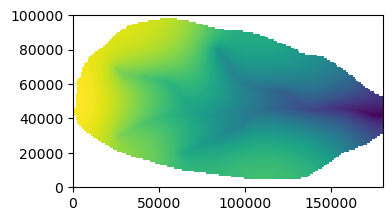

In [4]:
fine_topo = flopy.utils.Raster.load(ref_data / "fine_topo.tif")
fig = plt.figure(figsize=(4,4)) ; ax = fig.add_subplot() ; fine_topo.plot(ax=ax) ; plt.show(block=False)

In [5]:
def string2geom(geostring: str,conversion: float = None,) -> List[tuple]:
    if conversion is None:    multiplier = 1.0
    else:                     multiplier = float(conversion)
    res = []
    for line in geostring.split("\n"): 
        line = line.split(" ")    ;  x=pd.to_numeric(line[0],errors='coerce')*multiplier  ;y=pd.to_numeric(line[1],errors='coerce')*multiplier  ;res.append((x, y))
    return res

<Axes: xlabel='xcoord'>

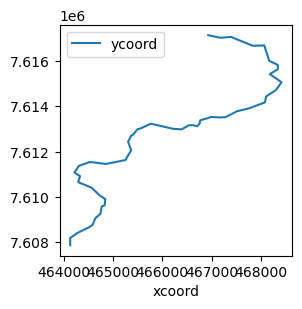

In [30]:
df.plot(x='xcoord', y='ycoord', kind="line", figsize=(3,3))


In [ ]:
path  = 'E:\\15_REPOS\\a07_EarthPy\\Tacho_02'
ref_data2 = os.path.join(path ,'s03.xlsx')            ; xls = ExcelFile(ref_data2) ; df = xls.parse(xls.sheet_names[0]); df.head(2)  #df.to_dict()
df['ab'] = df['xcoord'].astype(str) + ' ' + df['ycoord'].astype(str)               ; dff = df['ab'].to_string(index=False) ; boundary_polygon = dff; dff

#boundary_polygon = string2geom(geometry["boundary"])                                                          ; bp = np.array              (boundary_polygon)
boundary_polygon = string2geom(dff)                                                                            ; bp = np.array              (boundary_polygon)
#stream_segs = (geometry["streamseg1"],geometry["streamseg2"],geometry["streamseg3"],geometry["streamseg4"])   ;  sgs = [string2geom(sg) for sg in stream_segs]
#a1=pd.DataFrame(boundary_polygon) ;a1.to_csv(sim_ws/"01_boundary_polygon.csv")

fig = plt.figure(figsize=(5,5))  ; ax = fig.add_subplot() #; ax.set_aspect("equal") ; riv_colors = ("blue", "cyan", "green", "orange", "red")
ax.plot(bp[:, 0], bp[:, 1], "ro-")
#for idx, sg in enumerate(sgs):
#    sa = np.array(sg)  ; ax.plot(sa[:, 0], sa[:, 1], color=riv_colors[idx], lw=0.75, marker="o")

In [ ]:
#ref_data2 = os.path.join(path ,'11b.xlsx')  ; xls = ExcelFile(ref_data2)    ; df1 = xls.parse(xls.sheet_names[0]); df1.head(2)
#df1['ab'] = df1['xcoord'].astype(str) + ' ' + df1['ycoord'].astype(str)     ; dff = df1['ab'].to_string(index=False) ; dff
#ref_data2 = os.path.join(path ,'11b.xlsx')  ; xls = ExcelFile(ref_data2)  ; df2 = xls.parse(xls.sheet_names[0])

In [ ]:
#df1['ab'] = df1['xcoord'].astype(str)  + ' ' + df1['ycoord'].astype(str); df1['ab'] ; s1 = df1['ab'].to_string(index=False) 
#df2['ab'] = df2['xcoord'].astype(str) + ' ' + df2['ycoord'].astype(str); df2['ab'] ; s2 = df2['ab'].to_string(index=False) ; 
#stream_segs = (s1,s1)       #                                                                               ; sgs = [string2geom(sg) for sg in stream_segs]
#stream_segs

In [ ]:
#volume = float(input("Enter volume of sphere in mm^3: "))
#volume = input("Enter volume of sphere in mm^3: ").split("*") #float(dff)

In [ ]:
#boundary_polygon = string2geom(geometry["boundary"])                                                          ; bp = np.array              (boundary_polygon)
boundary_polygon = string2geom(dff)                                                                            ; bp = np.array              (boundary_polygon)
#stream_segs = (geometry["streamseg1"],geometry["streamseg2"],geometry["streamseg3"],geometry["streamseg4"])   ;  sgs = [string2geom(sg) for sg in stream_segs]
#a1=pd.DataFrame(boundary_polygon) ;a1.to_csv(sim_ws/"01_boundary_polygon.csv")

fig = plt.figure(figsize=(5,5))  ; ax = fig.add_subplot() ; ax.set_aspect("equal") ; riv_colors = ("blue", "cyan", "green", "orange", "red")
ax.plot(bp[:, 0], bp[:, 1], "ro-")
#for idx, sg in enumerate(sgs):
#    sa = np.array(sg)  ; ax.plot(sa[:, 0], sa[:, 1], color=riv_colors[idx], lw=0.75, marker="o")

In [ ]:
#geo1 = pd.DataFrame(geometry,index=[1,2,3,4]) ; geo1.to_csv (sim_ws/ "geometry1.csv")  # 5 2749 1899 699 599 649
geo2 = pd.DataFrame(geometry,index=[0]) ; geo2.to_csv (sim_ws/ "geometry2.csv")  # 5 2749 1899 699 599 649

In [ ]:
Lx=180000 ;Ly=100000; dx=dy=2500.0 ;nrow=int(Ly/dy)+1 ;ncol=int(Lx/dx)+1 ; 

In [10]:
def string2geom(geostring: str,conversion: float = None,) -> List[tuple]:
    if conversion is None:    multiplier = 1.0
    else:                     multiplier = float(conversion)
    res = []
    for line in geostring.split("\n"):  #x = pd.to_numeric(line[0], errors='coerce') * multiplier
        line = line.split(" ")       ;  x = float(line[0]) * multiplier   ; y = float(line[1]) * multiplier   ; res.append((x, y))
    return res

In [ ]:
def set_structured_idomain(modelgrid: flopy.discretization.StructuredGrid,boundary: List[tuple]) -> None:
    if modelgrid.grid_type != "structured":
        raise ValueError(f"modelgrid must be 'structured' not '{modelgrid.grid_type}'")
    ix = GridIntersect(modelgrid, method="vertex", rtree=True)   ; result = ix.intersect(Polygon(boundary))
    idx = [coords for coords in result.cellids]   ; idx = np.array(idx, dtype=int) ; nr = idx.shape[0]
    if idx.ndim == 1:
        idx = idx.reshape((nr, 1))
    idx = tuple([idx[:, i] for i in range(idx.shape[1])])               ; idomain = np.zeros(modelgrid.shape[1:], dtype=int)
    idomain[idx] = 1       ; idomain = idomain.reshape(modelgrid.shape) ; modelgrid.idomain = idomain
    return

working_grid = StructuredGrid(nlay=1,delr=np.full(ncol, dx),delc=np.full(nrow, dy),xoff=0.0,yoff=0.0,
                              top=np.full((nrow, ncol), 1000.0),botm=np.full((1, nrow, ncol), -100.0))
set_structured_idomain(working_grid, boundary_polygon)
print("grid data: ", Lx, Ly, nrow, ncol)

NameError: name 'ncol' is not defined

In [ ]:
top_wg  = fine_topo.resample_to_grid  (working_grid,band=fine_topo.bands[0],method="linear",extrapolate_edges=True)
def intersect_segments(modelgrid: Union[flopy.discretization.StructuredGrid, flopy.discretization.VertexGrid],
                       segments: List[List[tuple]]) -> Tuple[flopy.utils.GridIntersect, list, list]:
    ixs = flopy.utils.GridIntersect(modelgrid,method=modelgrid.grid_type)  ; cellids = []  ; lengths = []
    for sg in segments:
        v = ixs.intersect(LineString(sg), sort_by_cellid=True) ; cellids += v["cellids"].tolist()  ; lengths += v["lengths"].tolist()
    return ixs, cellids, lengths
ixs, cellids, lengths = intersect_segments(working_grid, sgs)  ; intersection_rg = np.zeros(working_grid.shape[1:])
for loc in cellids:     intersection_rg[loc] = 1
fig = plt.figure(figsize=(5,5))  ; ax = fig.add_subplot() ; pmv = flopy.plot.PlotMapView(modelgrid=working_grid)
ax.set_aspect("equal")           ; pmv.plot_array(top_wg) ; pmv.plot_array(intersection_rg,masked_values=[0,],alpha=0.2,cmap="Reds_r")
pmv.plot_inactive(color_noflow="white") ; ax.plot(bp[:, 0], bp[:, 1], "r-")   # ; plt.colorbar(??, fig)
for sg in sgs:
    sa = np.array(sg)  ; ax.plot(sa[:, 0], sa[:, 1], "b-")
plt.show(block=False)

In [ ]:
# print
river_locations = working_grid.idomain[0].copy() ; index = tuple(np.array(list(zip(*cellids))))    ;river_locations [index] = 2 
working_grid.idomain = river_locations.reshape(1, nrow, ncol)  ; plt.imshow(working_grid.idomain[0])

In [ ]:
def build_drain_data(modelgrid: Union[flopy.discretization.StructuredGrid, flopy.discretization.VertexGrid],cellids: list,
                     lengths: list,leakance: float,elevation: np.ndarray,) -> List[tuple]:
    drn_data = []
    for cellid, length in zip(cellids, lengths):
        x = modelgrid.xcellcenters[cellid]    ; width = 5.0 + (14.0 / Lx) * (Lx - x)  ; conductance = leakance * length * width
        if not isinstance(cellid, tuple):
            cellid = (cellid,)
        drn_data.append((0, *cellid, elevation[cellid], conductance))
    return drn_data
nlay = 5 ; dv0 = 5.0
leakance = 1.0 / (0.5 * dv0)  ; drn_data = build_drain_data(working_grid,cellids,lengths,leakance,top_wg)  #; drn_data[:10]

In [ ]:
def cell_areas(modelgrid: Union[flopy.discretization.StructuredGrid, flopy.discretization.VertexGrid]) -> np.ndarray:
    if modelgrid.grid_type == "structured":
        nrow, ncol = modelgrid.nrow, modelgrid.ncol ; areas = np.zeros((nrow, ncol), dtype=float)
        for r in range(nrow):
            for c in range(ncol): 
                cellid = (r, c) ; vertices = np.array(modelgrid.get_cell_vertices(cellid)) ; area = Polygon(vertices).area ; areas[cellid] = area
    elif modelgrid.grid_type == "vertex": 
        areas = np.zeros(modelgrid.ncpl, dtype=float)
        for idx in range(modelgrid.ncpl): 
            vertices = np.array(modelgrid.get_cell_vertices(idx))  ; area = Polygon(vertices).area ; areas[idx] = area
    else:   raise ValueError(+ f"{modelgrid.grid_type}")
    return areas

In [ ]:
def build_groundwater_discharge_data(modelgrid: Union[flopy.discretization.StructuredGrid, flopy.discretization.VertexGrid],
                                     leakance: float,elevation: np.ndarray,) -> List[tuple]:
    areas = cell_areas(modelgrid)   ; drn_data = [] ; idomain = modelgrid.idomain[0]
    for idx in range(modelgrid.ncpl):
        if modelgrid.grid_type == "structured":  r, c = modelgrid.get_lrc(idx)[0][1:]  ; cellid = (r, c)
        else:                                    cellid = idx 
        area = areas[cellid]
        if idomain[cellid] == 1:
            conductance = leakance * area
            if not isinstance(cellid, tuple):    cellid = (cellid,)
            drn_data.append((0, *cellid, elevation[cellid] - 0.5, conductance, 1.0))
    return drn_data
gw_discharge_data = build_groundwater_discharge_data(working_grid,leakance,top_wg)  # gw_discharge_data[:10]

In [ ]:
idomain = np.array([working_grid.idomain[0, :, :].copy() for k in range(nlay)])
strt    = np.array([top_wg.copy() for k in range(nlay)], dtype=float)
topc    = np.zeros((nlay, nrow, ncol), dtype=float)   ; botm = np.zeros((nlay, nrow, ncol), dtype=float)
dv      = dv0 ; topc[0] = top_wg.copy()  ; botm[0] = topc[0] - dv
for idx in range(1, nlay):  dv *= 1.5  ; topc[idx] = botm[idx - 1] ; botm[idx] = topc[idx] - dv
for k in range(nlay): print('layer', (topc[k] - botm[k]).mean())

In [ ]:
sim = flopy.mf6.MFSimulation(sim_ws=sim_ws,exe_name="mf6",memory_print_option="summary",)

flopy.mf6.ModflowTdis(sim)
flopy.mf6.ModflowIms(sim,complexity="simple",print_option="SUMMARY",csv_outer_output_filerecord="outer.csv",
                           csv_inner_output_filerecord="inner.csv",linear_acceleration="bicgstab",outer_maximum=1000,inner_maximum=100,
                           outer_dvclose=1e-4,inner_dvclose=1e-5,preconditioner_levels=2,relaxation_factor=0.0)
gwf = flopy.mf6.ModflowGwf (sim,print_input=True,save_flows=True,newtonoptions="NEWTON UNDER_RELAXATION")
flopy.mf6.ModflowGwfdis    (gwf,nlay=nlay,nrow=nrow,ncol=ncol,delr=dx,delc=dy,idomain=idomain,top=top_wg,botm=botm,xorigin=0.0,yorigin=0.0)
flopy.mf6.ModflowGwfic     (gwf, strt=strt)
flopy.mf6.ModflowGwfnpf    (gwf,save_specific_discharge=True,icelltype=1,k=1.0)
flopy.mf6.ModflowGwfrcha   (gwf,recharge=0.000001)
flopy.mf6.ModflowGwfdrn    (gwf,maxbound=len(drn_data),stress_period_data=drn_data,pname="river",filename="drn_riv.drn")
flopy.mf6.ModflowGwfdrn    (gwf,auxiliary=["depth"],auxdepthname="depth",maxbound=len(gw_discharge_data),
                            stress_period_data=gw_discharge_data,pname="gwd",filename="drn_gwd.drn")
flopy.mf6.ModflowGwfoc     (gwf,head_filerecord=f"{gwf.name}.hds",budget_filerecord=f"{gwf.name}.cbc",
                            saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],printrecord=[("BUDGET", "ALL")]) ; 

#### Count the number of active cells

In [ ]:
def get_model_cell_count(model: Union[flopy.mf6.ModflowGwf,flopy.mf6.ModflowGwt]) -> Tuple[int, int]:
    modelgrid = model.modelgrid
    if modelgrid.grid_type == "structured":
        nlay, nrow, ncol = modelgrid.nlay, modelgrid.nrow, modelgrid.ncol ; ncells = nlay * nrow * ncol ; idomain = modelgrid.idomain
        if idomain is None:             nactive = nlay * nrow * ncol
        else:                           nactive = np.count_nonzero(idomain == 1)
    elif modelgrid.grid_type == "vertex":
        nlay, ncpl = modelgrid.nlay, modelgrid.ncpl ; ncells = nlay * ncpl ;         idomain = modelgrid.idomain
        if idomain is None:             nactive = nlay * ncpl
        else:                           nactive = np.count_nonzero(idomain == 1)
    else:         raise ValueError(f"modelgrid grid type '{modelgrid.grid_type}' not supported")
    return ncells, nactive
def get_simulation_cell_count(simulation: flopy.mf6.MFSimulation,) -> Tuple[int, int]:
    ncells = 0 ;     nactive = 0
    for model_name in simulation.model_names:
        model = simulation.get_model(model_name) ; i, j = get_model_cell_count(model) ; ncells += i ; nactive += j
    return ncells, nactive
ncells, nactive = get_simulation_cell_count(sim) ;  print("nr. of cells:", ncells, ", active:", nactive)

In [ ]:
sim.write_simulation()